In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import astropy.units as u
from astropy.table import Table, Column

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 100
params = {'legend.fontsize': 'medium',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'medium',
         'axes.titlesize': 'medium',
         'xtick.labelsize': 'medium',
         'ytick.labelsize': 'medium'}
pylab.rcParams.update(params)

from caterpillar import catalog

In [2]:
#colors
cmap = matplotlib.cm.get_cmap('plasma_r')
cn = cmap(0.25)
cc = 'blue'
cd_dg = cmap(0.65)
cd_gd = 'magenta'
cg_dg = 'maroon'
cg_gd = 'red'
alpha = 0.9

# Labels
ln = 'Non-anomaly ($s_\mathrm{tot} < 3\sigma$)'
lc = 'High total anomaly ($s_\mathrm{tot} > 3\sigma$)'
ld = r'$s_\mathrm{disc} > 3\sigma$ sample'
lg = r'$s_\mathrm{gen} > 3\sigma$ sample'
ld_dg = r'$s_\mathrm{disc} > 3\sigma$, $s_\mathrm{disc} > s_\mathrm{gen}$'
ld_gd = r'$s_\mathrm{disc} > 3\sigma$, $s_\mathrm{disc} < s_\mathrm{gen}$'
lg_dg = r'$s_\mathrm{gen} > 3\sigma$, $s_\mathrm{disc} > s_\mathrm{gen}$'
lg_gd = r'$s_\mathrm{gen} > 3\sigma$, $s_\mathrm{disc} < s_\mathrm{gen}$'

# line styles 
lsn = '-'
lsc = ':'
lsd_dg = '-'
lsd_gd = ':'
lsg_dg = '-'
lsg_gd = ':'

In [3]:
anom_file = '/scratch/ksf293/anomalies/data/hsc_catalogs/anomaly_catalog_hsc_full.fits'
anom_cat = Table.read(anom_file)

In [4]:
print([s for s in anom_cat.columns if 'score' in s])

['discriminator_score_normalized', 'generator_score_normalized', 'combined_score_normalized']


In [5]:
shape_types_to_add = ['i_sdss_shape', 'i_cmodel_exp_ellipse', 'i_cmodel_ellipse', 
                 'r_cmodel_exp_ellipse', 'r_cmodel_ellipse']
for shape_type in shape_types_to_add:
    anom_cat = catalog.moments_to_shape(anom_cat, shape_type=shape_type, update=True)

In [6]:
# compute aperture ratios
anom_cat['r_aperature_ratio'] = np.log10(anom_cat['r_convolvedflux_3_20_flux'] / anom_cat['r_cmodel_flux'])
anom_cat['i_aperature_ratio'] = np.log10(anom_cat['i_convolvedflux_3_20_flux'] / anom_cat['i_cmodel_flux'])

# compute colors
anom_cat['gr_color_cmod'] = (-2.5 * np.log10(anom_cat['g_cmodel_flux']/ anom_cat['r_cmodel_flux']))
anom_cat['ri_color_cmod'] = (-2.5 * np.log10(anom_cat['r_cmodel_flux']/ anom_cat['i_cmodel_flux']))

# log of R_eff
anom_cat['i_cmodel_ellipse_logr'] = np.log10(anom_cat['i_cmodel_ellipse_r'])

<ipython-input-6-356a0c4fa2b4>:2: RuntimeWarning: divide by zero encountered in true_divide
  anom_cat['r_aperature_ratio'] = np.log10(anom_cat['r_convolvedflux_3_20_flux'] / anom_cat['r_cmodel_flux'])
<ipython-input-6-356a0c4fa2b4>:2: RuntimeWarning: invalid value encountered in log10
  anom_cat['r_aperature_ratio'] = np.log10(anom_cat['r_convolvedflux_3_20_flux'] / anom_cat['r_cmodel_flux'])
<ipython-input-6-356a0c4fa2b4>:3: RuntimeWarning: invalid value encountered in log10
  anom_cat['i_aperature_ratio'] = np.log10(anom_cat['i_convolvedflux_3_20_flux'] / anom_cat['i_cmodel_flux'])
<ipython-input-6-356a0c4fa2b4>:6: RuntimeWarning: divide by zero encountered in true_divide
  anom_cat['gr_color_cmod'] = (-2.5 * np.log10(anom_cat['g_cmodel_flux']/ anom_cat['r_cmodel_flux']))
<ipython-input-6-356a0c4fa2b4>:6: RuntimeWarning: invalid value encountered in true_divide
  anom_cat['gr_color_cmod'] = (-2.5 * np.log10(anom_cat['g_cmodel_flux']/ anom_cat['r_cmodel_flux']))
<ipython-input-6-356a

In [7]:
print([s for s in anom_cat.columns if 'ellipse' in s])

['i_cmodel_exp_ellipse_11', 'i_cmodel_exp_ellipse_22', 'i_cmodel_exp_ellipse_12', 'i_cmodel_ellipse_11', 'i_cmodel_ellipse_22', 'i_cmodel_ellipse_12', 'r_cmodel_exp_ellipse_11', 'r_cmodel_exp_ellipse_22', 'r_cmodel_exp_ellipse_12', 'r_cmodel_ellipse_11', 'r_cmodel_ellipse_22', 'r_cmodel_ellipse_12', 'i_cmodel_exp_ellipse_r', 'i_cmodel_exp_ellipse_e', 'i_cmodel_exp_ellipse_theta', 'i_cmodel_ellipse_r', 'i_cmodel_ellipse_e', 'i_cmodel_ellipse_theta', 'r_cmodel_exp_ellipse_r', 'r_cmodel_exp_ellipse_e', 'r_cmodel_exp_ellipse_theta', 'r_cmodel_ellipse_r', 'r_cmodel_ellipse_e', 'r_cmodel_ellipse_theta', 'i_cmodel_ellipse_logr']


In [8]:
mask_disc = anom_cat['discriminator_score_normalized'] > 3
mask_gen = anom_cat['generator_score_normalized'] > 3
mask_dg = anom_cat['discriminator_score_normalized'] > anom_cat['generator_score_normalized']
mask_gd = anom_cat['discriminator_score_normalized'] <= anom_cat['generator_score_normalized']
mask_comb = anom_cat['combined_score_normalized'] > 3

anom_gen = anom_cat[mask_gen]
anom_disc = anom_cat[mask_disc]

anom_disc_dg = anom_cat[mask_disc & mask_dg] #the combination used in the paper
anom_disc_gd = anom_cat[mask_disc & mask_gd]
anom_gen_dg = anom_cat[mask_gen & mask_dg]
anom_gen_gd = anom_cat[mask_gen & mask_gd]

anom_comb = anom_cat[mask_comb]
anom_norm = anom_cat[~mask_comb]

In [9]:
anom_cats_nc = [anom_norm, anom_comb]
anom_colors_nc = [cn, cc]
anom_labels_nc = [ln, lc]
anom_lss_nc = [lsn, lsc]

anom_cats_dg = [anom_disc_dg, anom_disc_gd, anom_gen_dg, anom_gen_gd]
anom_colors_dg = [cd_dg, cd_gd, cg_dg, cg_gd]
anom_labels_dg = [ld_dg, ld_gd, lg_dg, lg_gd]
anom_lss_dg = [lsd_dg, lsd_gd, lsg_dg, lsg_gd]

In [10]:
range_dict = {
                'gr_color_cmod': (-0.8, 2.9),
                'ri_color_cmod': (-0.8, 2.9),
                'r_aperature_ratio': (-2, 0.5),
                'i_aperature_ratio': (-2, 0.5),
                'i_cmodel_ellipse_logr': (-0.5, 1.5),
                'i_cmodel_ellipse_e': (0, 1),
             }
xlabel_dict = {
                'gr_color_cmod': r'$g-r$ color',
                'ri_color_cmod': r'$r-i$ color',
                'r_aperature_ratio': r'$r_{\rm Aper,20}/r_{\rm CModel}$',
                'i_aperature_ratio': r'$i_{\rm Aper,20}/i_{\rm CModel}$',
                'i_cmodel_ellipse_logr': r'$\log_{10} (R_{\rm eff})$', 
                'i_cmodel_ellipse_e': r'Ellipcitiy',
               }

In [11]:
def plot_histogram(ax, quantity_name, anom_cats, colors, labels, linestyles, legend_loc='upper right'):
    
    histtype='step'
    lw=1.5
    
    for i, cat in enumerate(anom_cats):
        vals = cat[quantity_name] 

        ax.hist(vals, lw=lw, histtype=histtype, bins=35, density=True, range=range_dict[quantity_name], 
                 color=colors[i], label=labels[i], ls=linestyles[i], alpha=alpha)

    ax.set_xlabel(xlabel_dict[quantity_name])
    ax.set_ylabel('normalized counts')
    
    ax.set_xlim(range_dict[quantity_name])
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], 1.4*ylim[1])
    
    ax.legend(loc=legend_loc)

## Figure for paper: chosen properties

- is it ok for labels to have the generic property, or should i include "cmodel" etc?

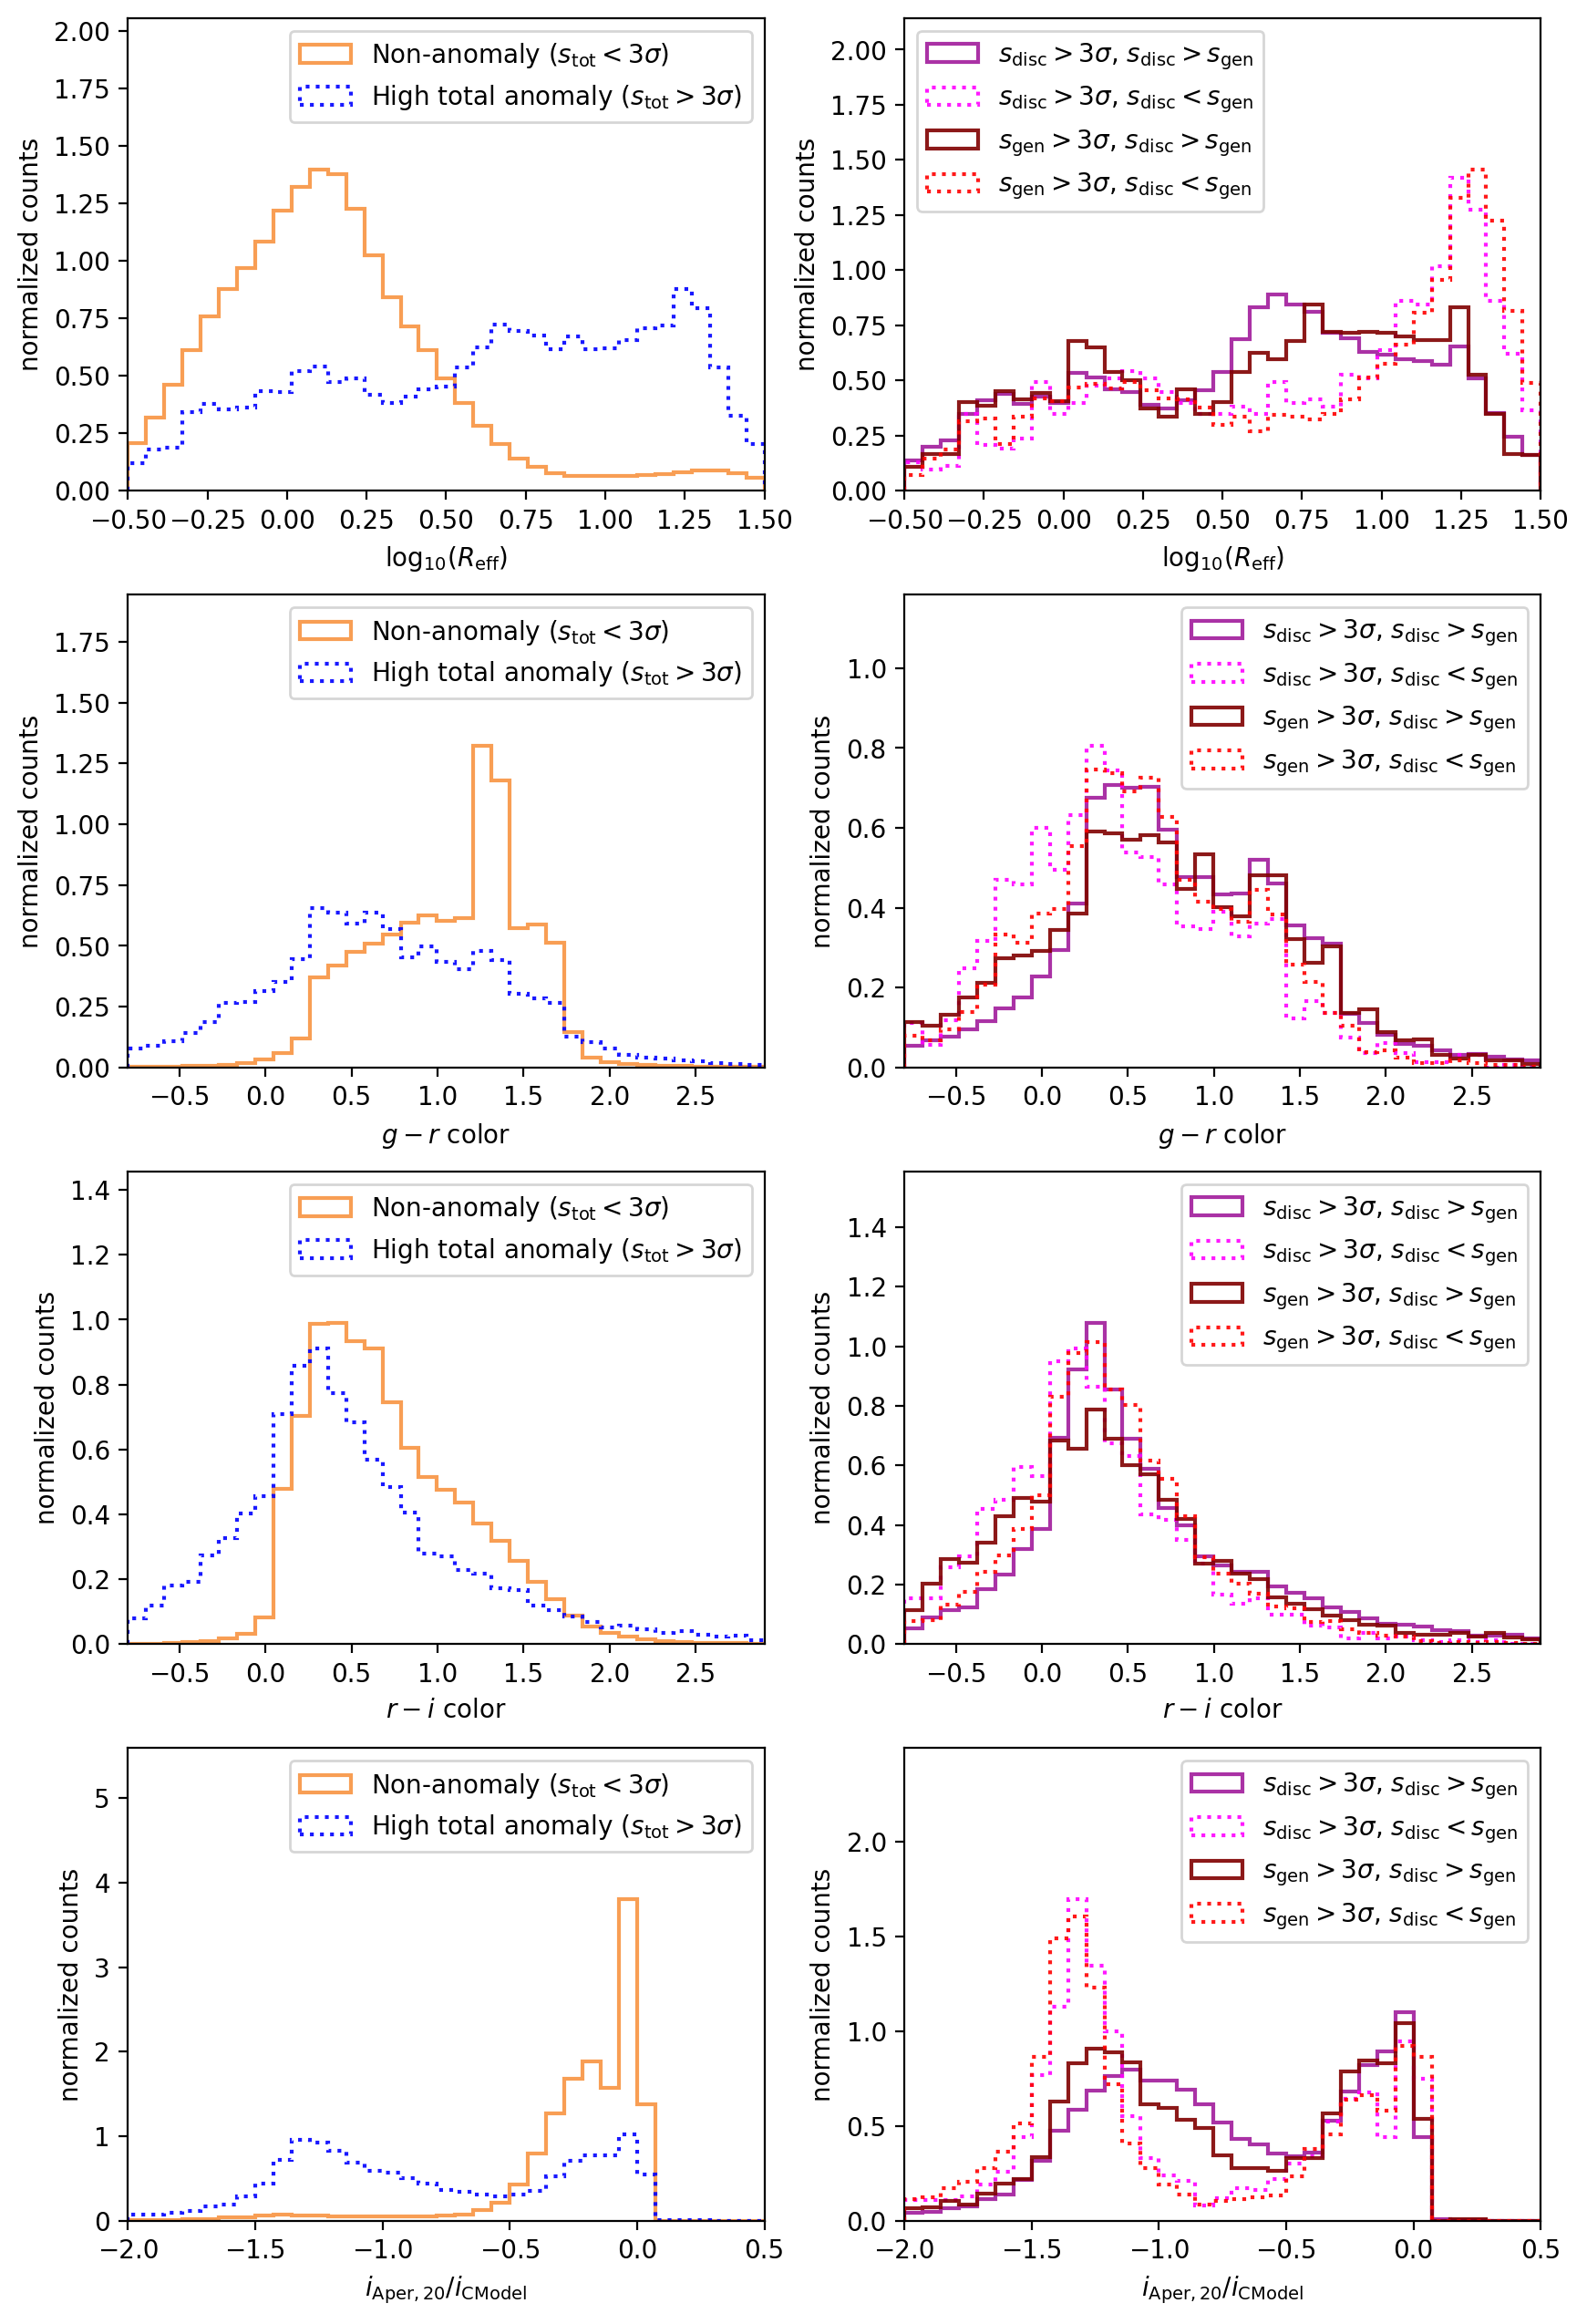

In [12]:
nrows = 4
ncols = 2
fig, axarr = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
plt.subplots_adjust(hspace=0.22, wspace=0.22)

plot_histogram(axarr[0][0], 'i_cmodel_ellipse_logr', anom_cats_nc, anom_colors_nc, anom_labels_nc, anom_lss_nc)
plot_histogram(axarr[0][1], 'i_cmodel_ellipse_logr', anom_cats_dg, anom_colors_dg, anom_labels_dg, anom_lss_dg,
               legend_loc='upper left')

plot_histogram(axarr[1][0], 'gr_color_cmod', anom_cats_nc, anom_colors_nc, anom_labels_nc, anom_lss_nc)
plot_histogram(axarr[1][1], 'gr_color_cmod', anom_cats_dg, anom_colors_dg, anom_labels_dg, anom_lss_dg)

plot_histogram(axarr[2][0], 'ri_color_cmod', anom_cats_nc, anom_colors_nc, anom_labels_nc, anom_lss_nc)
plot_histogram(axarr[2][1], 'ri_color_cmod', anom_cats_dg, anom_colors_dg, anom_labels_dg, anom_lss_dg)

plot_histogram(axarr[3][0], 'i_aperature_ratio', anom_cats_nc, anom_colors_nc, anom_labels_nc, anom_lss_nc)
plot_histogram(axarr[3][1], 'i_aperature_ratio', anom_cats_dg, anom_colors_dg, anom_labels_dg, anom_lss_dg)


## Other properties we checked

We are only showing the i-band flux ratio because it is very similar to the r-band:

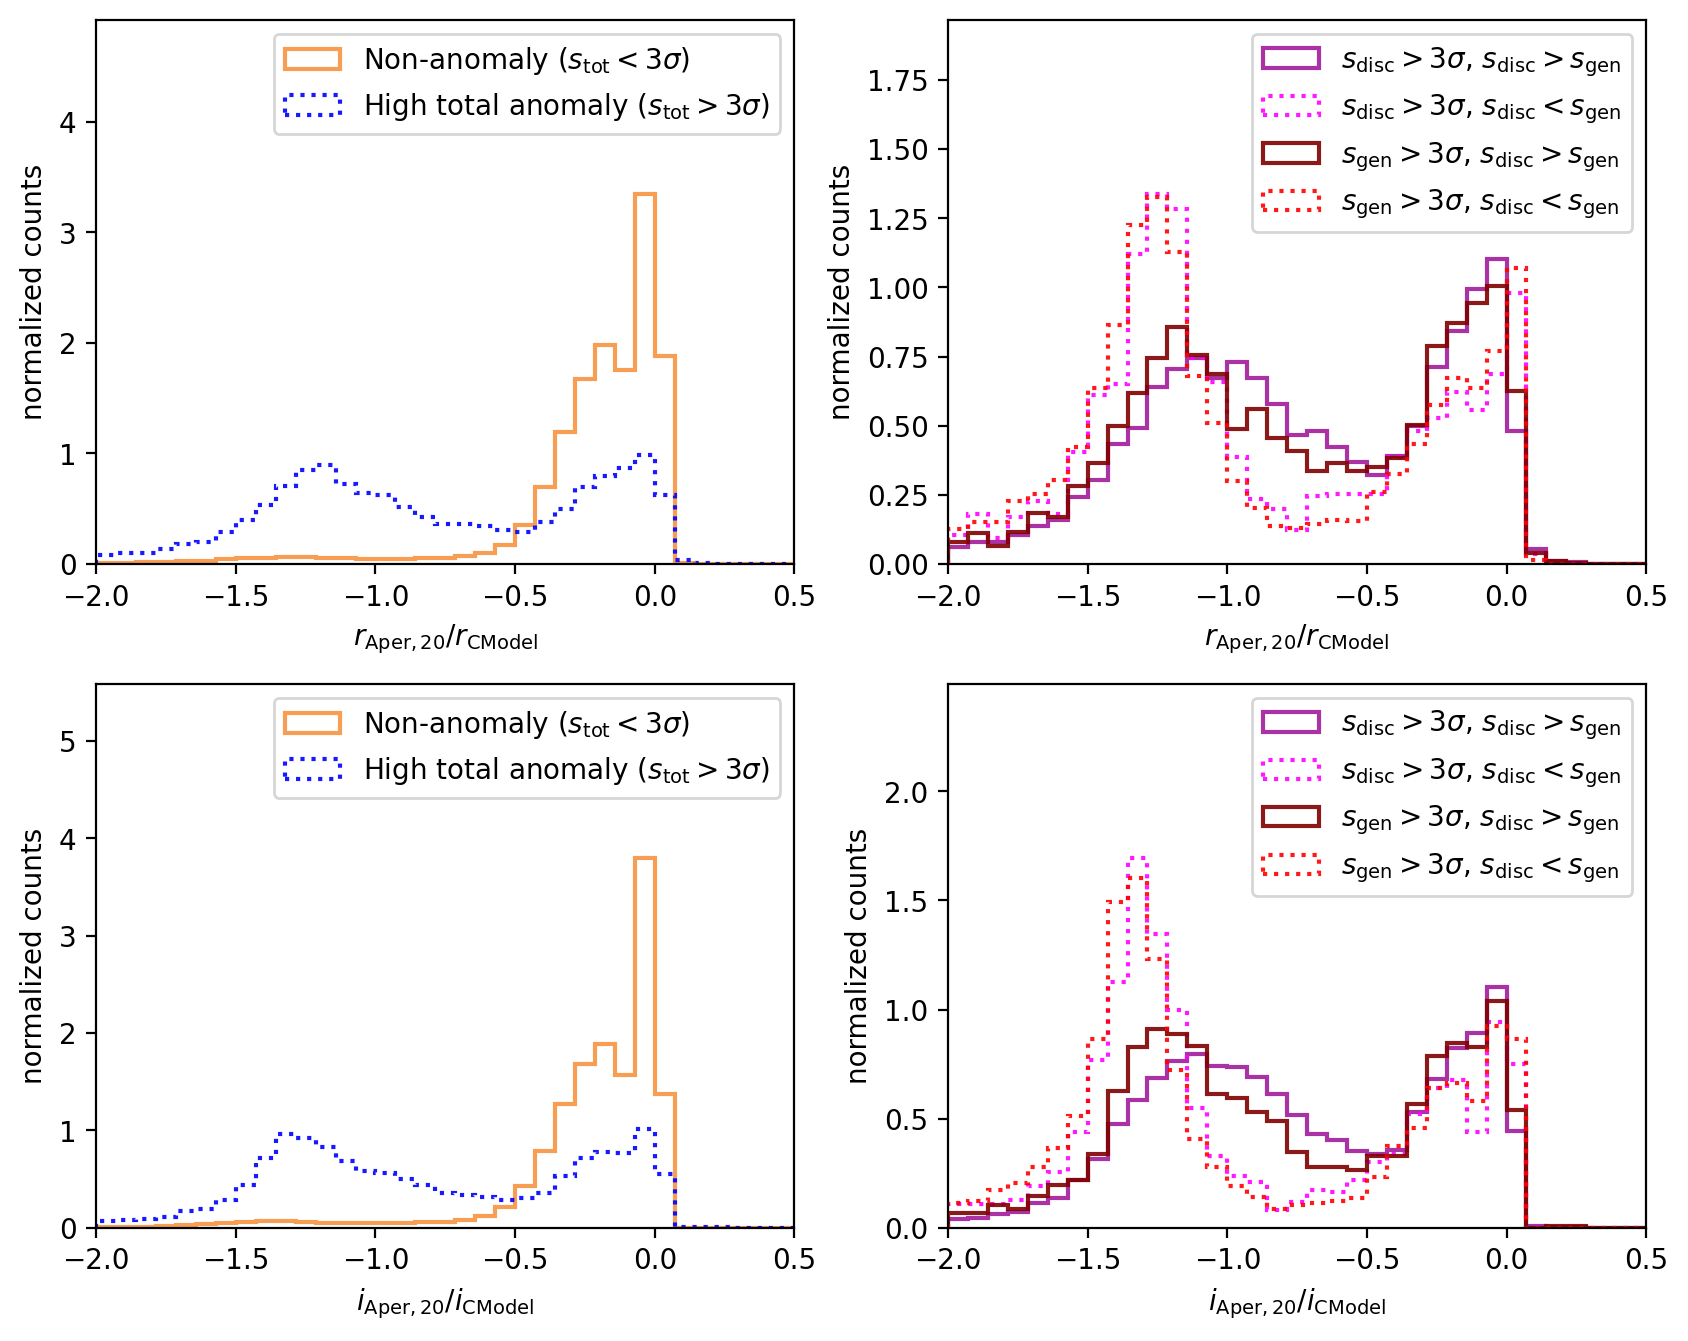

In [13]:
nrows = 2
ncols = 2
fig, axarr = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
plt.subplots_adjust(hspace=0.22, wspace=0.22)

plot_histogram(axarr[0][0], 'r_aperature_ratio', anom_cats_nc, anom_colors_nc, anom_labels_nc, anom_lss_nc)
plot_histogram(axarr[0][1], 'r_aperature_ratio', anom_cats_dg, anom_colors_dg, anom_labels_dg, anom_lss_dg)

plot_histogram(axarr[1][0], 'i_aperature_ratio', anom_cats_nc, anom_colors_nc, anom_labels_nc, anom_lss_nc)
plot_histogram(axarr[1][1], 'i_aperature_ratio', anom_cats_dg, anom_colors_dg, anom_labels_dg, anom_lss_dg)

Ellipticity is mainly showing that (as we're not excluding the objects within the new bright star mask and not excluding very compact objects) the high anomaly sample picks up ones at the extremes, likely due to bad fits:

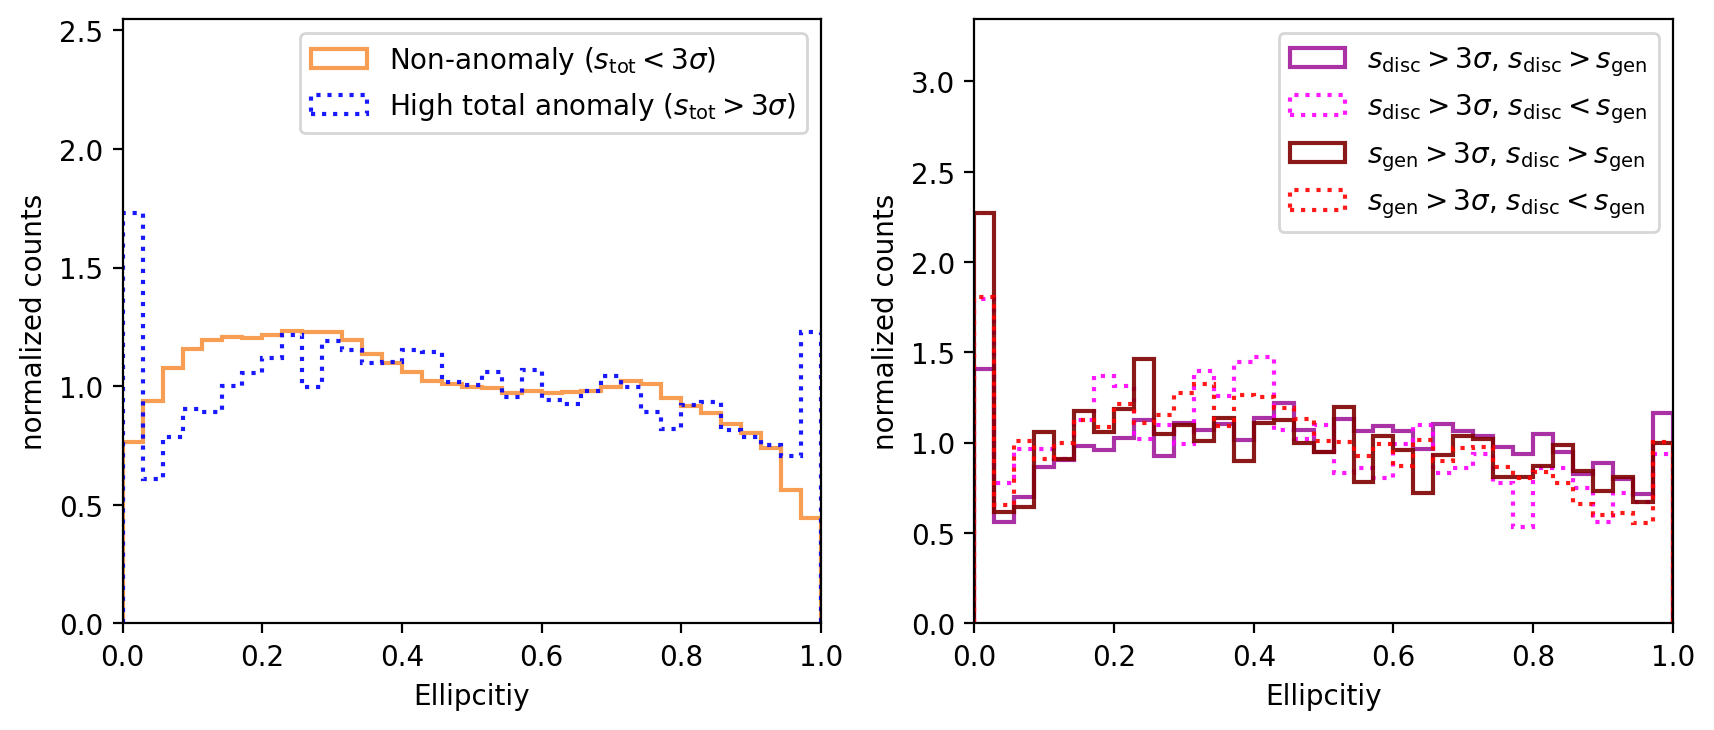

In [14]:
nrows = 1
ncols = 2
fig, axarr = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
plt.subplots_adjust(hspace=0.22, wspace=0.22)

plot_histogram(axarr[0], 'i_cmodel_ellipse_e', anom_cats_nc, anom_colors_nc, anom_labels_nc, anom_lss_nc)
plot_histogram(axarr[1], 'i_cmodel_ellipse_e', anom_cats_dg, anom_colors_dg, anom_labels_dg, anom_lss_dg)